In [9]:
import pandas as pd

# Load the final DataFrame from the saved CSV
try:
    df_final = pd.read_csv('../data/Processed/df_final.csv')
    print("DataFrame 'df_final' cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'df_final.csv' no se encontró. Asegúrate de haberlo guardado en la carpeta correcta.")

# Seleccionar las variables numéricas clave
numeric_vars = ['age', 'watch_duration_minutes', 'completion_percentage', 'total_watch_time_hours']

# Calcular las medidas de tendencia central
print("--- Medidas de Tendencia Central ---")
print("Media:")
print(df_final[numeric_vars].mean())
print("\nMediana:")
print(df_final[numeric_vars].median())
print("\nModa:")
print(df_final[numeric_vars].mode().iloc[0]) # .iloc[0] para mostrar el primer valor si hay múltiples modas

# Calcular las medidas de dispersión
print("\n--- Medidas de Dispersión ---")
print("Varianza:")
print(df_final[numeric_vars].var())
print("\nDesviación Estándar:")
print(df_final[numeric_vars].std())
print("\nRangos:")
print(df_final[numeric_vars].max() - df_final[numeric_vars].min())

DataFrame 'df_final' cargado exitosamente.
--- Medidas de Tendencia Central ---
Media:
age                        41.538551
watch_duration_minutes     78.907871
completion_percentage      78.384990
total_watch_time_hours    352.365682
dtype: float64

Mediana:
age                        42.0
watch_duration_minutes     79.0
completion_percentage      84.5
total_watch_time_hours    324.1
dtype: float64

Moda:
age                        62.0
watch_duration_minutes     23.0
completion_percentage     100.0
total_watch_time_hours    438.7
Name: 0, dtype: float64

--- Medidas de Dispersión ---
Varianza:
age                         195.049335
watch_duration_minutes     2025.638780
completion_percentage       460.649707
total_watch_time_hours    53911.288195
dtype: float64

Desviación Estándar:
age                        13.966006
watch_duration_minutes     45.007097
completion_percentage      21.462752
total_watch_time_hours    232.188045
dtype: float64

Rangos:
age                         47.0

### outliers

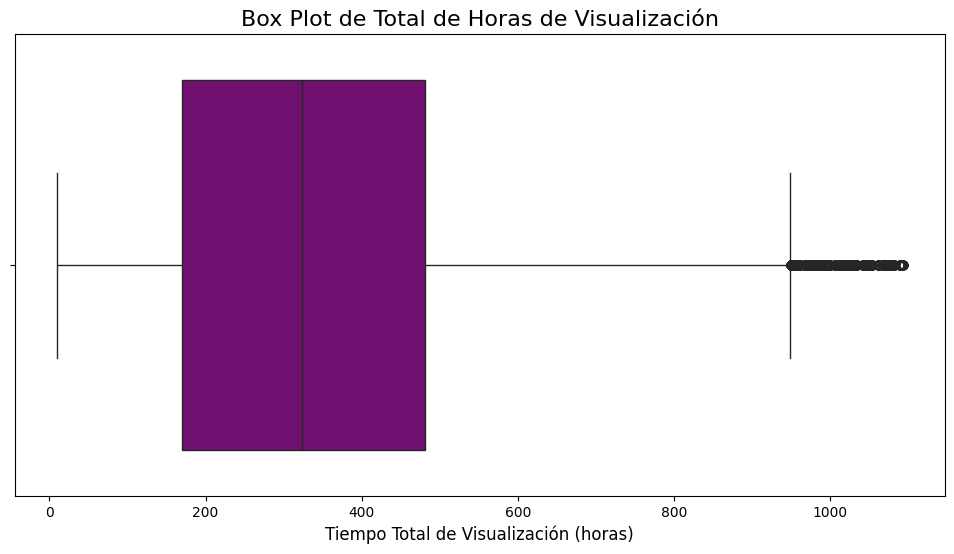

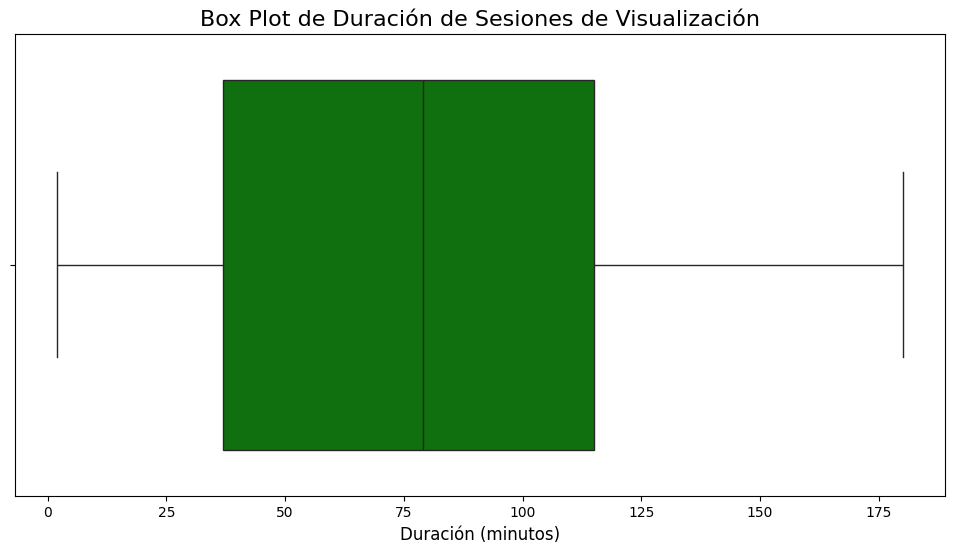

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot para total_watch_time_hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['total_watch_time_hours'], color='purple')
plt.title('Box Plot de Total de Horas de Visualización', fontsize=16)
plt.xlabel('Tiempo Total de Visualización (horas)', fontsize=12)
plt.show()

# Box plot para watch_duration_minutes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['watch_duration_minutes'], color='green')
plt.title('Box Plot de Duración de Sesiones de Visualización', fontsize=16)
plt.xlabel('Duración (minutos)', fontsize=12)
plt.show()

### Análisis de Correlación

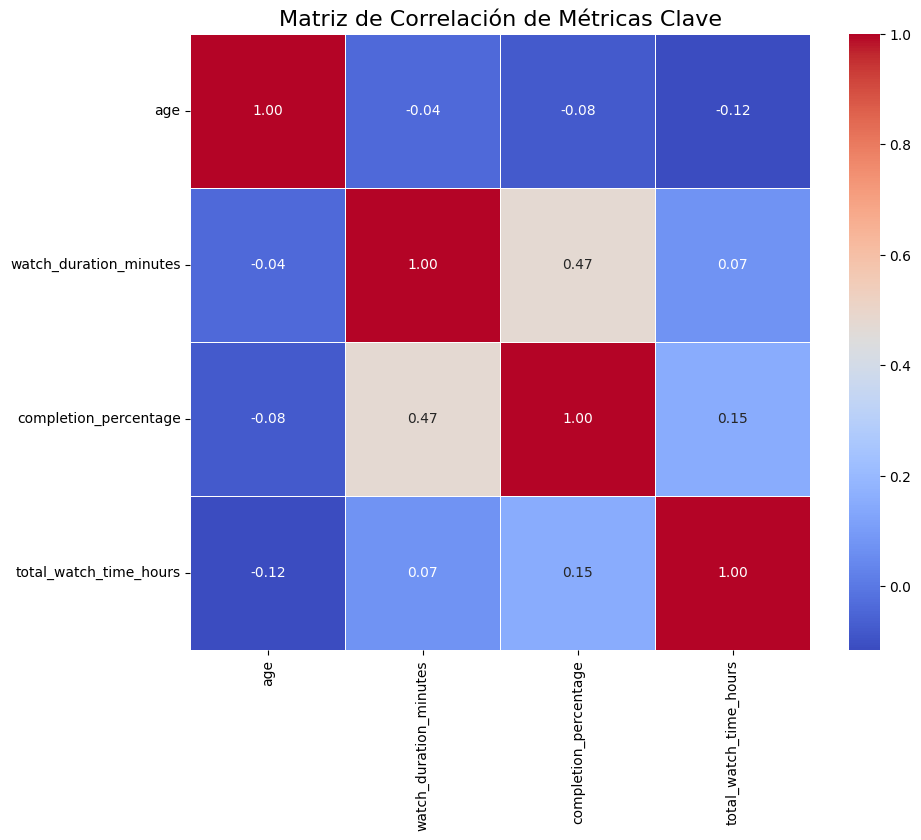


Matriz de Correlación:
                             age  watch_duration_minutes  \
age                     1.000000               -0.037797   
watch_duration_minutes -0.037797                1.000000   
completion_percentage  -0.078440                0.473724   
total_watch_time_hours -0.115300                0.074354   

                        completion_percentage  total_watch_time_hours  
age                                 -0.078440               -0.115300  
watch_duration_minutes               0.473724                0.074354  
completion_percentage                1.000000                0.154132  
total_watch_time_hours               0.154132                1.000000  


In [11]:
correlation_matrix = df_final[numeric_vars].corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Métricas Clave', fontsize=16)
plt.show()

print("\nMatriz de Correlación:")
print(correlation_matrix)

In [12]:
from scipy import stats

# Separar los datos por tipo de suscripción
premium_users = df_final[df_final['subscription_type'] == 'Premium']['total_watch_time_hours']
basic_users = df_final[df_final['subscription_type'] == 'Basic']['total_watch_time_hours']

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(premium_users, basic_users, equal_var=False)

# Interpretar los resultados
print("\n--- Resultados de la Prueba t de Student (Premium vs. Basic) ---")
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.3f}")

if p_value < 0.05:
    print("Conclusión: La diferencia en el tiempo de visualización es estadísticamente significativa.")
else:
    print("Conclusión: No hay una diferencia estadísticamente significativa en el tiempo de visualización.")


--- Resultados de la Prueba t de Student (Premium vs. Basic) ---
Estadístico t: 206.44
Valor p: 0.000
Conclusión: La diferencia en el tiempo de visualización es estadísticamente significativa.
